In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
import ltspice
import subprocess
import pickle
import os

In [5]:
file_path_10 = "Model\\sim1\\config10\\"

net_name_FIMV_10 = "all_netfile_FIMV_10"
# net_name_FIMV_10 = "all_FIMV_10"
output_file_FIMV_10 = file_path_10 + net_name_FIMV_10 +'.net'

net_name_FVMI_10 = "all_netfile_FVMI_10"
# net_name_FVMI_10 = "all_FVMI_10"
output_file_FVMI_10 = file_path_10 + net_name_FVMI_10 +'.net'

In [6]:
file_path_11 = "Model\\sim1\\config11\\"

net_name_FIMV_11 = "all_netfile_FIMV_11"
output_file_FIMV_11 = file_path_11 + net_name_FIMV_11 +'.net'

net_name_FVMI_11 = "all_netfile_FVMI_11"
output_file_FVMI_11 = file_path_11 + net_name_FVMI_11 +'.net'

In [7]:
# Path to LTSpice executable
ltspice_exe = 'C:\\Program Files\\ADI\\LTspice\\LTspice.exe'

def RunLTsimulation(netlist_file):
    # Run LTSpice simulation
    subprocess.run([ltspice_exe, '-b', netlist_file], check=True)

In [8]:
# Path to the netlist file
netlist_file_FIMV_10 = output_file_FIMV_10

#running simulation
RunLTsimulation(netlist_file_FIMV_10)

# Extract data
# Load the LTSpice data
lt_FIMV_10 = ltspice.Ltspice(file_path_10 + net_name_FIMV_10 +'.raw')
lt_FIMV_10.parse()

In [9]:
# Path to the netlist file
netlist_file_FVMI_10 = output_file_FVMI_10 

#running simulation
RunLTsimulation(netlist_file_FVMI_10)

# Extract data
# Load the LTSpice data
lt_FVMI_10 = ltspice.Ltspice(file_path_10 + net_name_FVMI_10 +'.raw')
lt_FVMI_10.parse()

In [10]:
# Path to the netlist file
netlist_file_FIMV_11 = output_file_FIMV_11

#running simulation
RunLTsimulation(netlist_file_FIMV_11)

# Extract data
# Load the LTSpice data
lt_FIMV_11 = ltspice.Ltspice(file_path_11 + net_name_FIMV_11 +'.raw')
lt_FIMV_11.parse()

In [11]:
# Path to the netlist file
netlist_file_FVMI_11 = output_file_FVMI_11 

#running simulation
RunLTsimulation(netlist_file_FVMI_11)

# Extract data
# Load the LTSpice data
lt_FVMI_11 = ltspice.Ltspice(file_path_11 + net_name_FVMI_11 +'.raw')
lt_FVMI_11.parse()

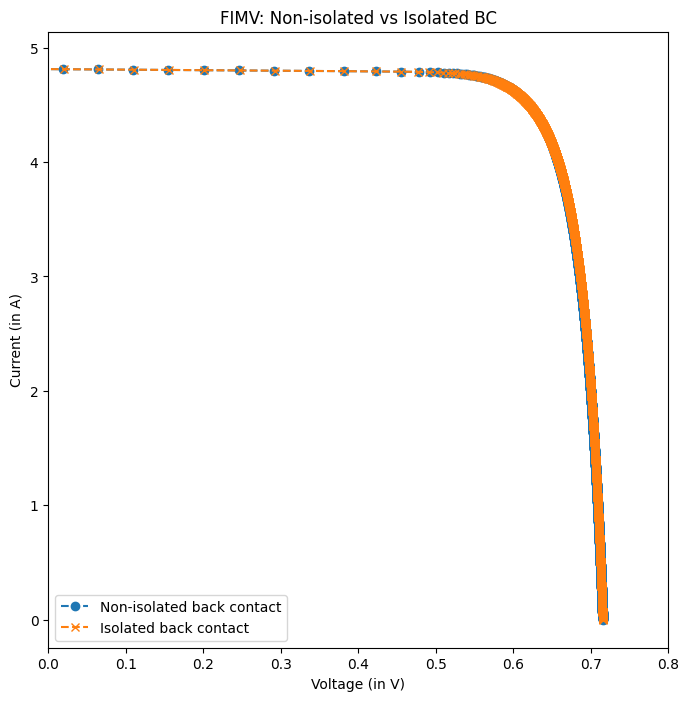

In [12]:
I_FIMV_10 = lt_FIMV_10.get_data("V(imeas)")
V_FIMV_10 = lt_FIMV_10.get_data("V(vmeas)")

I_FIMV_11 = lt_FIMV_11.get_data("V(imeas)")
V_FIMV_11 = lt_FIMV_11.get_data("V(vmeas)")

I_trimmed_FIMV_10 = I_FIMV_10
V_trimmed_FIMV_10 = V_FIMV_10

I_trimmed_FIMV_11 = I_FIMV_11
V_trimmed_FIMV_11 = V_FIMV_11

plt.figure(figsize=[8,8])

plt.plot(V_trimmed_FIMV_10,I_trimmed_FIMV_10,"--o",label="Non-isolated back contact")
plt.plot(V_trimmed_FIMV_11,I_trimmed_FIMV_11,"--x",label="Isolated back contact")
plt.xlabel("Voltage (in V)")
plt.ylabel("Current (in A)")
plt.title("FIMV: Non-isolated vs Isolated BC")
plt.xlim([0,0.8])
plt.legend()
plt.show()

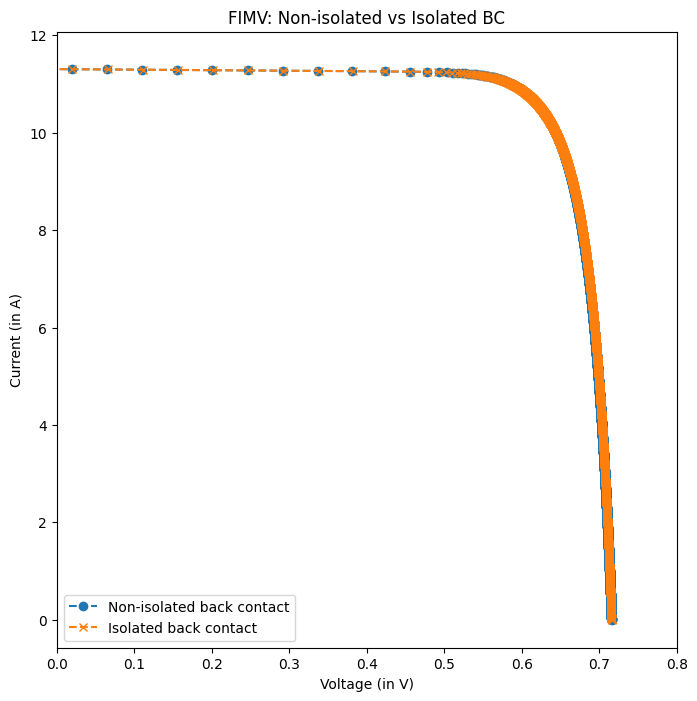

In [15]:
I_FIMV_10 = lt_FIMV_10.get_data("I(V2)")
V_FIMV_10_p = lt_FIMV_10.get_data("V(vcell+)")
V_FIMV_10_n = lt_FIMV_10.get_data("V(vcell-)")

I_FIMV_11 = lt_FIMV_11.get_data("I(V2)")
V_FIMV_11_p = lt_FIMV_11.get_data("V(vcell+)")
V_FIMV_11_n = lt_FIMV_11.get_data("V(vcell-)")

I_trimmed_FIMV_10 = I_FIMV_10
V_trimmed_FIMV_10 = V_FIMV_10

I_trimmed_FIMV_11 = I_FIMV_11
V_trimmed_FIMV_11 = V_FIMV_11

plt.figure(figsize=[8,8])

# plt.plot(V_trimmed_FIMV_10,I_trimmed_FIMV_10,"--o",label="Non-isolated back contact")
# plt.plot(V_trimmed_FIMV_11,I_trimmed_FIMV_11,"--x",label="Isolated back contact")
plt.plot(V_FIMV_10_p - V_FIMV_10_n, -I_FIMV_10,"--o",label="Non-isolated back contact")
plt.plot(V_FIMV_11_p - V_FIMV_11_n, -I_FIMV_11,"--x",label="Isolated back contact")
plt.xlabel("Voltage (in V)")
plt.ylabel("Current (in A)")
plt.title("FIMV: Non-isolated vs Isolated BC")
plt.xlim([0,0.8])
plt.legend()
plt.show()

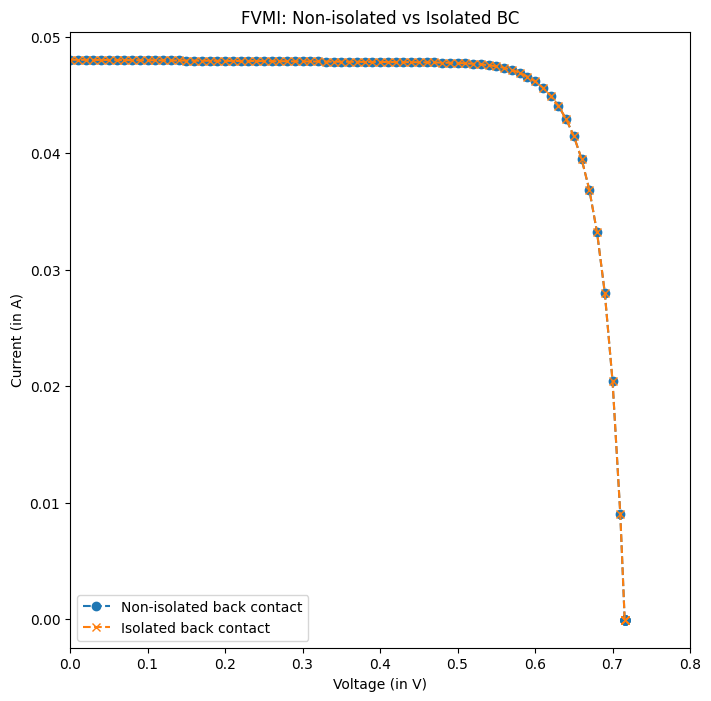

In [14]:
I_FVMI_10 = lt_FVMI_10.get_data("V(imeas)")
V_FVMI_10 = lt_FVMI_10.get_data("V(vmeas)")

I_FVMI_11 = lt_FVMI_11.get_data("V(imeas)")
V_FVMI_11 = lt_FVMI_11.get_data("V(vmeas)")

I_trimmed_FVMI_10 = I_FVMI_10
V_trimmed_FVMI_10 = V_FVMI_10

I_trimmed_FVMI_11 = I_FVMI_11
V_trimmed_FVMI_11 = V_FVMI_11

plt.figure(figsize=[8,8])

plt.plot(V_trimmed_FVMI_10,I_trimmed_FVMI_10,"--o",label="Non-isolated back contact")
plt.plot(V_trimmed_FVMI_11,I_trimmed_FVMI_11,"--x",label="Isolated back contact")
plt.xlabel("Voltage (in V)")
plt.ylabel("Current (in A)")
plt.title("FVMI: Non-isolated vs Isolated BC")
plt.xlim([0,0.8])
plt.legend()
plt.show()